## SPOTIFY DATA ANALYSIS
The following is the analysis of the data taken from the spotify api for the artists in the past decade,approx.2000 tracks of the past decade as well as the top tracks of 2020 as per the spotify.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

In [170]:
df=pd.read_csv('data/tracks.csv')
df1=pd.read_csv('data/top_tracks2.csv')
df2=pd.read_csv('C://Users//verma//Desktop//spotME//data/artists.csv')

### Artist's Data Analysis 

In [171]:
df2.head()

Unnamed: 0       artist_name                         followers  \
0           0  Lindsey Stirling  {'href': None, 'total': 1532973}   
1           1         Peach Pit   {'href': None, 'total': 248847}   
2           2        Will Smith   {'href': None, 'total': 646208}   
3           3        Witt Lowry   {'href': None, 'total': 377726}   
4           4      Bill Withers   {'href': None, 'total': 815504}   

                                               genre  popularity  \
0                          ['bow pop', 'pop violin']          69   
1    ['indie pop', 'modern rock', 'vancouver indie']          66   
2                                        ['hip hop']          71   
3                       ['indie pop rap', 'pop rap']          67   
4  ['classic soul', 'funk', 'motown', 'quiet stor...          70   

                       ID  
0  378dH6EszOLFShpRzAQkVM  
1  6fC2AcsQtd9h4BWELbbire  
2  41qil2VaGbD194gaEcmmyx  
3  5ghnxpW47ojtLHHyTLdxdY  
4  1ThoqLcyIYvZn7iWbj8fsj

In [172]:
df2.isnull().sum()

Unnamed: 0     0
artist_name    0
followers      0
genre          0
popularity     0
ID             0
dtype: int64

In [173]:
df2.describe()

Unnamed: 0  popularity
count  550.000000  550.000000
mean   274.500000   66.545455
std    158.915596    4.524446
min      0.000000   58.000000
25%    137.250000   64.000000
50%    274.500000   66.000000
75%    411.750000   69.000000
max    549.000000   84.000000

### Data Cleaning 

In [174]:
follow=[]
follow=df2.followers.values

In [175]:
len(follow)

550

In [176]:
g=[]
for i in range(len(follow)):
    x=follow[i][24:-1]
    g.append(int(x))    

In [177]:
df2.followers=g
df2.head()

Unnamed: 0       artist_name  followers  \
0           0  Lindsey Stirling    1532973   
1           1         Peach Pit     248847   
2           2        Will Smith     646208   
3           3        Witt Lowry     377726   
4           4      Bill Withers     815504   

                                               genre  popularity  \
0                          ['bow pop', 'pop violin']          69   
1    ['indie pop', 'modern rock', 'vancouver indie']          66   
2                                        ['hip hop']          71   
3                       ['indie pop rap', 'pop rap']          67   
4  ['classic soul', 'funk', 'motown', 'quiet stor...          70   

                       ID  
0  378dH6EszOLFShpRzAQkVM  
1  6fC2AcsQtd9h4BWELbbire  
2  41qil2VaGbD194gaEcmmyx  
3  5ghnxpW47ojtLHHyTLdxdY  
4  1ThoqLcyIYvZn7iWbj8fsj

In [178]:
df2.drop(['Unnamed: 0','ID'],1,inplace=True)

In [179]:
x=df2.groupby("popularity").max()

In [180]:
df2.shape

(550, 4)

In [181]:
df2.genre[1]

"['indie pop', 'modern rock', 'vancouver indie']"

In [182]:
length=[]
data=[]
data1=[]
for i in range(len(df2)):
    res=df2.genre[i].strip('][').split(', ')
    length.append(len(res))
    data.append(res[0])
    if(length[i]>1):
        data1.append(res[1])
    else:
        data1.append(None)
len(length)

550

In [183]:
len(data)

550

In [184]:
len(data1)

550

In [185]:
df2['number_genre']=length

In [186]:
df2.corr()

followers  popularity  number_genre
followers      1.000000    0.547044      0.019696
popularity     0.547044    1.000000     -0.216445
number_genre   0.019696   -0.216445      1.000000

Text(0.5, 1, 'Correlation Plot')

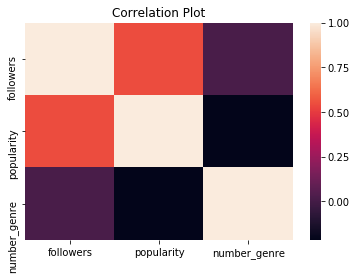

In [187]:
sns.heatmap(df2.corr()).set_title('Correlation Plot')

Text(0.5, 1.0, 'Popularity Plot vs Number of Genres')

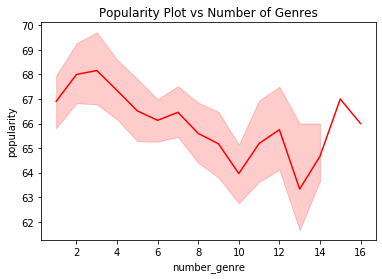

In [188]:
sns.lineplot(x='number_genre',y='popularity',data=df2,color='r').set_title('Popularity Plot vs Number of Genres')

Text(0.5, 1.0, 'Number of Artists with different number of Genres')

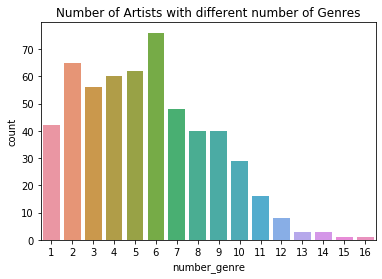

In [189]:
sns.countplot(df2.number_genre).set_title('Number of Artists with different number of Genres')

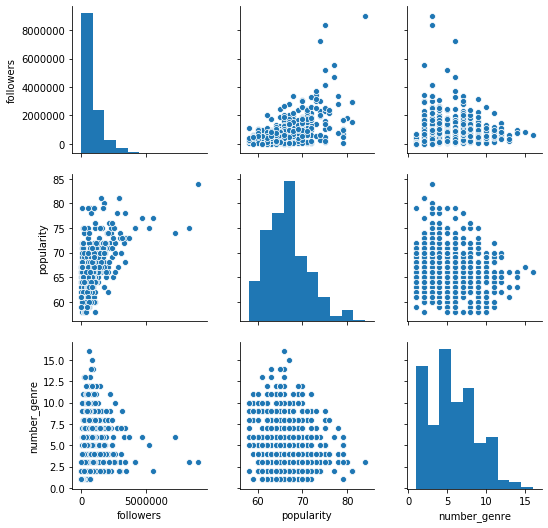

In [190]:
sns.pairplot(df2)

In [191]:
df2['first_genre']=data
df2['second_genre']=data1
df2.head()

artist_name  followers  \
0  Lindsey Stirling    1532973   
1         Peach Pit     248847   
2        Will Smith     646208   
3        Witt Lowry     377726   
4      Bill Withers     815504   

                                               genre  popularity  \
0                          ['bow pop', 'pop violin']          69   
1    ['indie pop', 'modern rock', 'vancouver indie']          66   
2                                        ['hip hop']          71   
3                       ['indie pop rap', 'pop rap']          67   
4  ['classic soul', 'funk', 'motown', 'quiet stor...          70   

   number_genre      first_genre   second_genre  
0             2        'bow pop'   'pop violin'  
1             3      'indie pop'  'modern rock'  
2             1        'hip hop'           None  
3             2  'indie pop rap'      'pop rap'  
4             5   'classic soul'         'funk'

In [192]:
x=df2.groupby('first_genre')['followers'].sum()

In [193]:
f=df2.groupby(['first_genre'])['artist_name'].max()

In [194]:
ddf=pd.DataFrame(f)

In [195]:
ddf.index.names=['Genre']

In [196]:
r=df2.groupby('first_genre')['artist_name'].count()

In [197]:
r

first_genre
"canadian children's music"     1
'abstract beats'                1
'acid rock'                     1
'acoustic pop'                 11
'adult standards'              18
                               ..
'vapor pop'                     1
‘classical’                     1
‘disney’,’hip hop’              1
‘edm’                           1
‘hip hop’                       1
Name: artist_name, Length: 187, dtype: int64

In [198]:
x

first_genre
"canadian children's music"       67037
'abstract beats'                  96599
'acid rock'                      831799
'acoustic pop'                  5331054
'adult standards'              10524868
                                 ...   
'vapor pop'                      191007
‘classical’                       13694
‘disney’,’hip hop’                  834
‘edm’                             26752
‘hip hop’                         22856
Name: followers, Length: 187, dtype: int64

In [199]:
y=x.to_dict()

In [200]:
z=r.to_dict()

In [201]:
y["'acid rock'"]

831799

In [202]:
y.keys()

dict_keys(['"canadian children\'s music"', "'abstract beats'", "'acid rock'", "'acoustic pop'", "'adult standards'", "'afrofuturism'", "'alabama indie'", "'alabama rap'", "'alaska indie'", "'album rock'", "'alternative country'", "'alternative dance'", "'alternative hip hop'", "'alternative metal'", "'alternative r&b'", "'alternative rock'", "'ambient'", "'american contemporary classical'", "'anime latino'", "'anime rock'", "'ann arbor indie'", "'anthem worship'", "'anti-folk'", "'antiviral pop'", "'argentine ambient'", "'argentine hip hop'", "'arkansas country'", "'art pop'", "'art rock'", "'atl hip hop'", "'austin americana'", "'australian dance'", "'australian indie'", "'australian rock'", "'bachata'", "'baile pop'", "'bakersfield sound'", "'banda'", "'baroque pop'", "'baroque'", "'bass house'", "'bass trap'", "'baton rouge rap'", "'battle rap'", "'bebop'", "'bedroom pop'", "'belgian dance'", "'big room'", "'binaural'", "'birmingham grime'", "'bluegrass'", "'blues rock'", "'bolero'"

### Computing the popularity of genre amongst the people as well as artists 

In [203]:
j={}
for key, value in sorted(y.items(), key=lambda item: item[1],reverse=True):
    j.update({key:value})
    print("%s: %d" % (key, value))

'dance pop': 79656069
'album rock': 43647921
'banda': 21685118
'alternative metal': 18257057
'latin': 11785482
'adult standards': 10524868
'big room': 9240825
'baile pop': 9007118
'neo mellow': 8674082
'desi pop': 8368222
'cancion melodica': 8293118
'bow pop': 7815598
'k-pop': 6920356
'contemporary country': 6268153
'champeta': 6128714
'irish rock': 5911113
'argentine hip hop': 5891688
'edm': 5712338
'modern rock': 5621762
'latin hip hop': 5581692
'acoustic pop': 5331054
'alternative dance': 5219700
'grupera': 4859452
'cantautor': 4714431
'alternative hip hop': 4603711
'afrofuturism': 4494577
'art pop': 4265505
'dance rock': 4137491
'british soul': 4093263
'alternative r&b': 3841812
'east coast hip hop': 3728285
'g funk': 3630509
'alternative rock': 3584175
'conscious hip hop': 3301790
'classic soul': 3296713
'classic rock': 2917684
'anthem worship': 2902042
'classical': 2810495
'belgian dance': 2770991
'atl hip hop': 2724487
'crunk': 2654717
'bolero': 2541197
'folk-pop': 2505374
'indi

In [204]:
k={}
for key, value in sorted(z.items(), key=lambda item: item[1],reverse=True):
    k.update({key:value})
    print("%s: %d" % (key, value))

'dance pop': 62
'album rock': 34
'banda': 20
'adult standards': 18
'alternative metal': 18
'contemporary country': 14
'acoustic pop': 11
'alternative hip hop': 10
'anthem worship': 9
'big room': 9
'latin': 9
'alternative dance': 8
'bow pop': 8
'art pop': 7
'classical': 7
'edm': 7
'atl hip hop': 6
'neo mellow': 6
'alternative r&b': 5
'alternative rock': 5
'crunk': 5
'dirty south rap': 5
'hip hop': 5
'hollywood': 5
'k-pop': 5
'modern rock': 5
'classic rock': 4
'classic soul': 4
'disney': 4
'east coast hip hop': 4
'electropop': 4
'indie pop': 4
'pop rap': 4
'afrofuturism': 3
'alternative country': 3
'battle rap': 3
'broadway': 3
'chillhop': 3
'country': 3
'dance rock': 3
'escape room': 3
'grupera': 3
'irish rock': 3
'melodic metalcore': 3
'scorecore': 3
'sleep': 3
'trap': 3
'antiviral pop': 2
'argentine hip hop': 2
'art rock': 2
'bachata': 2
'bluegrass': 2
'british soul': 2
'canadian folk': 2
'cancion melodica': 2
'cartoon': 2
'champeta': 2
'chicago rap': 2
'chillwave': 2
'conscious hip h

In [205]:
dff=pd.DataFrame(j.items(), columns=['Genre', 'Followers'])

In [206]:
dff2=pd.DataFrame(k.items(),columns=['Genre','Number of Artists'])

In [207]:
dff=dff.merge(dff2,on='Genre')

In [208]:
dff=dff.merge(ddf,on='Genre')

##### Genre Results 

In [209]:
# final compilation of the results for each of the genres.
dff['rating per artists']=dff['Followers']/(dff['Number of Artists']*1000)
dff

Genre  Followers  Number of Artists  \
0            'dance pop'   79656069                 62   
1           'album rock'   43647921                 34   
2                'banda'   21685118                 20   
3    'alternative metal'   18257057                 18   
4                'latin'   11785482                  9   
..                   ...        ...                ...   
182          'music box'      10619                  1   
183      'environmental'       8759                  1   
184   'canadian hip hop'       8347                  1   
185        'movie tunes'        845                  1   
186   ‘disney’,’hip hop’        834                  1   

                 artist_name  rating per artists  
0            Victorious Cast         1284.775306  
1                        Yes         1283.762382  
2                Regulo Caro         1084.255900  
3                    Trivium         1014.280944  
4                       Zion         1309.498000  
..                       ...                 ...  
182            The Kiboomers           10.619000  
183  Thunderstorm Sound Bank            8.759000  
184                   Lentra            8.347000  
185                 LaChanze            0.845000  
186           Vaneese Thomas            0.834000  

[187 rows x 5 columns]

In [210]:
dff.corr()

Followers  Number of Artists  rating per artists
Followers            1.000000           0.946232            0.231069
Number of Artists    0.946232           1.000000            0.013839
rating per artists   0.231069           0.013839            1.000000

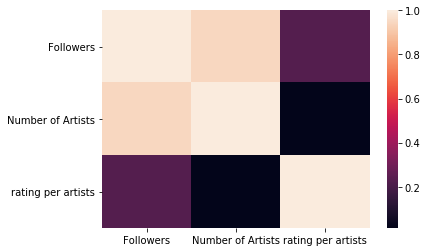

In [211]:
sns.heatmap(dff.corr())

In [212]:
dff.index=dff.Genre

In [213]:
dff.drop('Genre',1,inplace=True)

Text(0.5, 0.98, 'Top 10 Genres along with the artists and followers data')

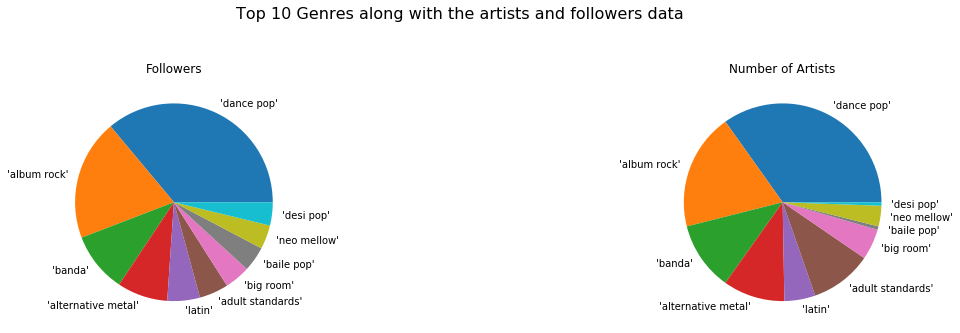

In [214]:
from matplotlib.gridspec import GridSpec
dff2=dff[:10]
# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='Number of Artists')
plot = plt.pie(dff2['Number of Artists'],labels=dff2.index)
plt.subplot(the_grid[0, 0], aspect=1, title='Followers')
plot = plt.pie(dff2['Followers'],labels=dff2.index)
plt.suptitle('Top 10 Genres along with the artists and followers data', fontsize=16)

In [215]:
df2.head()

artist_name  followers  \
0  Lindsey Stirling    1532973   
1         Peach Pit     248847   
2        Will Smith     646208   
3        Witt Lowry     377726   
4      Bill Withers     815504   

                                               genre  popularity  \
0                          ['bow pop', 'pop violin']          69   
1    ['indie pop', 'modern rock', 'vancouver indie']          66   
2                                        ['hip hop']          71   
3                       ['indie pop rap', 'pop rap']          67   
4  ['classic soul', 'funk', 'motown', 'quiet stor...          70   

   number_genre      first_genre   second_genre  
0             2        'bow pop'   'pop violin'  
1             3      'indie pop'  'modern rock'  
2             1        'hip hop'           None  
3             2  'indie pop rap'      'pop rap'  
4             5   'classic soul'         'funk'

In [216]:
lst=[]
for i in range(len(df2)):
    for j in range(len(dff)):
        if(df2.iloc[i,5]==dff.index[j] ):
            lst.append(dff.iloc[j,3])
df2['genre rating']=lst

In [217]:
df2

artist_name  followers  \
0        Lindsey Stirling    1532973   
1               Peach Pit     248847   
2              Will Smith     646208   
3              Witt Lowry     377726   
4            Bill Withers     815504   
..                    ...        ...   
545               Aaliyah    2063094   
546             The Roots     867614   
547           John Powell     102251   
548      The Decemberists     454078   
549  Camille Saint-SaÃ«ns     204342   

                                                 genre  popularity  \
0                            ['bow pop', 'pop violin']          69   
1      ['indie pop', 'modern rock', 'vancouver indie']          66   
2                                          ['hip hop']          71   
3                         ['indie pop rap', 'pop rap']          67   
4    ['classic soul', 'funk', 'motown', 'quiet stor...          70   
..                                                 ...         ...   
545  ['dance pop', 'hip hop', 'hip pop', 'pop', 'po...          62   
546  ['alternative hip hop', 'conscious hip hop', '...          63   
547  ['british soundtrack', 'scorecore', 'soundtrac...          64   
548  ['baroque pop', 'canadian indie', 'chamber pop...          59   
549                 ['classical', 'late romantic era']          64   

     number_genre            first_genre         second_genre  genre rating  
0               2              'bow pop'         'pop violin'    976.949750  
1               3            'indie pop'        'modern rock'    616.850250  
2               1              'hip hop'                 None    347.594800  
3               2        'indie pop rap'            'pop rap'    377.726000  
4               5         'classic soul'               'funk'    824.178250  
..            ...                    ...                  ...           ...  
545             7            'dance pop'            'hip hop'   1284.775306  
546             7  'alternative hip hop'  'conscious hip hop'    460.371100  
547             4   'british soundtrack'          'scorecore'    102.251000  
548             9          'baroque pop'     'canadian indie'    454.078000  
549             2            'classical'  'late romantic era'    401.499286  

[550 rows x 8 columns]

In [218]:
x=((df2['popularity']/100) *(df2['number_genre']/20) *df2['genre rating'] *df2['followers'])/(1.033e+06)

In [219]:
x

0      100.035812
1       14.711164
2        7.719224
3        9.253973
4      113.863616
          ...    
545    556.808183
546     85.259519
547      1.295522
548     52.993808
549      5.083023
Length: 550, dtype: float64

In [220]:
df2['Overall Rating']=x

In [221]:
df2.drop(['genre','second_genre'],1,inplace=True)
df2.head()

artist_name  followers  popularity  number_genre      first_genre  \
0  Lindsey Stirling    1532973          69             2        'bow pop'   
1         Peach Pit     248847          66             3      'indie pop'   
2        Will Smith     646208          71             1        'hip hop'   
3        Witt Lowry     377726          67             2  'indie pop rap'   
4      Bill Withers     815504          70             5   'classic soul'   

   genre rating  Overall Rating  
0     976.94975      100.035812  
1     616.85025       14.711164  
2     347.59480        7.719224  
3     377.72600        9.253973  
4     824.17825      113.863616

### Final Artists Rating

In [222]:
df2.sort_values('Overall Rating',ascending=False)

artist_name  followers  popularity  number_genre  \
27                   Anitta    9007118          84             3   
517             Neha Kakkar    8368222          75             3   
180          Ricardo Arjona    4714431          77             6   
254            Carlos Vives    3727737          73             6   
16          Cartel De Santa    5581692          77             2   
..                      ...        ...         ...           ...   
44                   Lentra       8347          67             1   
110  White Noise Meditation       4494          64             1   
190            Sleepy Times       2707          67             1   
522                LaChanze        845          61             1   
538          Vaneese Thomas        834          61             1   

            first_genre  genre rating  Overall Rating  
27          'baile pop'      9007.118     9895.595361  
517          'desi pop'      8368.222     7626.382563  
180         'cantautor'      4714.431     4970.158354  
254          'champeta'      3064.357     2421.745030  
16      'latin hip hop'      5581.692     2322.320416  
..                  ...           ...             ...  
44   'canadian hip hop'         8.347        0.002259  
110             'sleep'         9.282        0.001292  
190             'sleep'         9.282        0.000815  
522       'movie tunes'         0.845        0.000021  
538  ‘disney’,’hip hop’         0.834        0.000021  

[550 rows x 7 columns]

Genre Rating Distribution

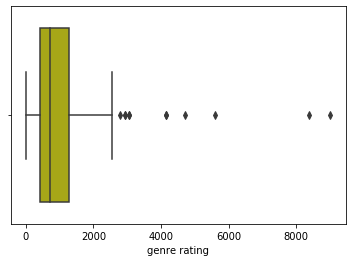

In [96]:
sns.boxplot(x=df2['genre rating'],color='y')

Overall Rating Distribution

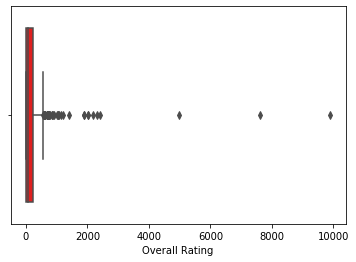

In [97]:
sns.boxplot(x=df2['Overall Rating'],color='red')

### DATA FOR THE TRACKS OF THE PAST DECADE 

In [98]:
df=pd.read_csv('data/tracks.csv')
df.drop(['Unnamed: 0'],1,inplace=True)

In [103]:
len(df['track_name'])

12823

In [104]:
# remove duplicates
cols=df.columns
df.drop_duplicates(subset =cols, 
                     keep = 'first', inplace = True) 

In [105]:
df.drop(['track_id'],1,inplace=True)

In [106]:
df=df.sort_values('popularity',ascending=False)
df.head()

artist_name                               track_name  \
1              Fleetwood Mac               Everywhere - 2017 Remaster   
2                David Bowie                   Heroes - 2017 Remaster   
0                Def Leppard  Pour Some Sugar On Me - Remastered 2017   
9761  Os Barões Da Pisadinha                               Tá Rocheda   
6463             David Bowie              Let's Dance - 2018 Remaster   

      popularity  danceability  energy  key  loudness  mode  speechiness  \
1             77         0.730   0.487    4   -10.991     1       0.0303   
2             75         0.490   0.758    7    -6.491     1       0.0297   
0             74         0.267   0.953    1    -4.899     0       0.0960   
9761          70         0.775   0.886    6    -6.680     0       0.0477   
6463          70         0.654   0.743   10    -7.440     0       0.0605   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
1         0.258000          0.010000    0.0852    0.731  114.965       226653   
2         0.000671          0.484000    0.0920    0.435  112.114       371413   
0         0.002110          0.000000    0.2830    0.568   84.989       267307   
9761      0.589000          0.000007    0.0991    0.939  172.017       203076   
6463      0.012500          0.027200    0.1530    0.632  114.846       457676   

      time_signature  
1                  4  
2                  4  
0                  4  
9761               4  
6463               4

Text(0.5, 1.0, 'Major vs Minor')

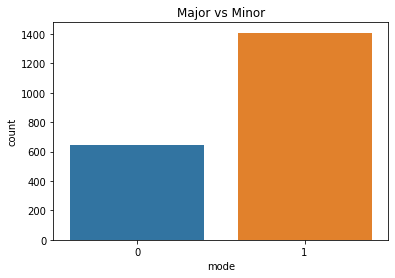

In [57]:
sns.countplot(x='mode',data=df).set_title('Major vs Minor')

Text(0.5, 1.0, 'Time Duration')

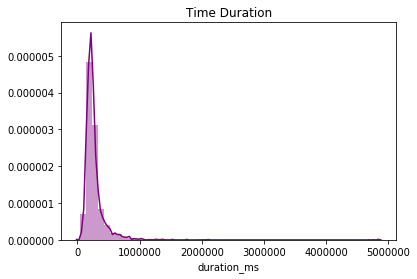

In [58]:
sns.distplot(df.duration_ms,color='purple').set_title('Time Duration')

In [59]:
df.corr()

popularity  danceability    energy       key  loudness  \
popularity          1.000000      0.090996  0.086505  0.008940  0.208844   
danceability        0.090996      1.000000  0.099932  0.059813  0.211235   
energy              0.086505      0.099932  1.000000 -0.027428  0.718167   
key                 0.008940      0.059813 -0.027428  1.000000 -0.025983   
loudness            0.208844      0.211235  0.718167 -0.025983  1.000000   
mode               -0.115448     -0.040368  0.009833 -0.148047 -0.013149   
speechiness        -0.004173      0.093254 -0.003301  0.029477 -0.143029   
acousticness       -0.095938     -0.142569 -0.746162  0.007327 -0.573531   
instrumentalness    0.009784     -0.077735 -0.267911 -0.005011 -0.366523   
liveness           -0.195443     -0.183119  0.162475 -0.022057 -0.020509   
valence            -0.015887      0.468501  0.334876  0.017139  0.280174   
tempo              -0.023213     -0.049901  0.251808 -0.014741  0.223230   
duration_ms        -0.187263     -0.152460 -0.000350 -0.020965 -0.154005   
time_signature     -0.012371      0.198564  0.177772  0.010631  0.220371   

                      mode  speechiness  acousticness  instrumentalness  \
popularity       -0.115448    -0.004173     -0.095938          0.009784   
danceability     -0.040368     0.093254     -0.142569         -0.077735   
energy            0.009833    -0.003301     -0.746162         -0.267911   
key              -0.148047     0.029477      0.007327         -0.005011   
loudness         -0.013149    -0.143029     -0.573531         -0.366523   
mode              1.000000    -0.053955      0.004420         -0.093737   
speechiness      -0.053955     1.000000      0.103015         -0.038165   
acousticness      0.004420     0.103015      1.000000          0.207592   
instrumentalness -0.093737    -0.038165      0.207592          1.000000   
liveness          0.123649     0.140302     -0.033271         -0.135912   
valence           0.076459    -0.068624     -0.274647         -0.242618   
tempo            -0.006836     0.039421     -0.177322         -0.093119   
duration_ms       0.004714    -0.047709     -0.036011          0.051733   
time_signature   -0.019088    -0.054604     -0.167802         -0.109890   

                  liveness   valence     tempo  duration_ms  time_signature  
popularity       -0.195443 -0.015887 -0.023213    -0.187263       -0.012371  
danceability     -0.183119  0.468501 -0.049901    -0.152460        0.198564  
energy            0.162475  0.334876  0.251808    -0.000350        0.177772  
key              -0.022057  0.017139 -0.014741    -0.020965        0.010631  
loudness         -0.020509  0.280174  0.223230    -0.154005        0.220371  
mode              0.123649  0.076459 -0.006836     0.004714       -0.019088  
speechiness       0.140302 -0.068624  0.039421    -0.047709       -0.054604  
acousticness     -0.033271 -0.274647 -0.177322    -0.036011       -0.167802  
instrumentalness -0.135912 -0.242618 -0.093119     0.051733       -0.109890  
liveness          1.000000 -0.094789  0.000181     0.170337        0.027900  
valence          -0.094789  1.000000  0.160243    -0.085501        0.155210  
tempo             0.000181  0.160243  1.000000    -0.013946        0.087501  
duration_ms       0.170337 -0.085501 -0.013946     1.000000        0.025217  
time_signature    0.027900  0.155210  0.087501     0.025217        1.000000

Text(0.5, 1, 'Correlation map for different track analysers')

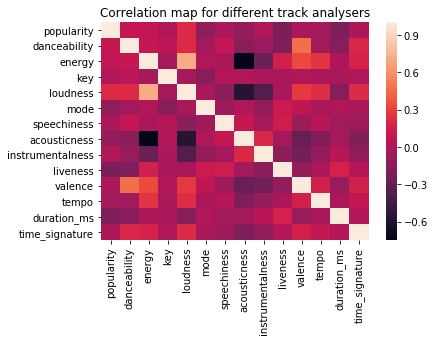

In [60]:
sns.heatmap(df.corr()).set_title('Correlation map for different track analysers')

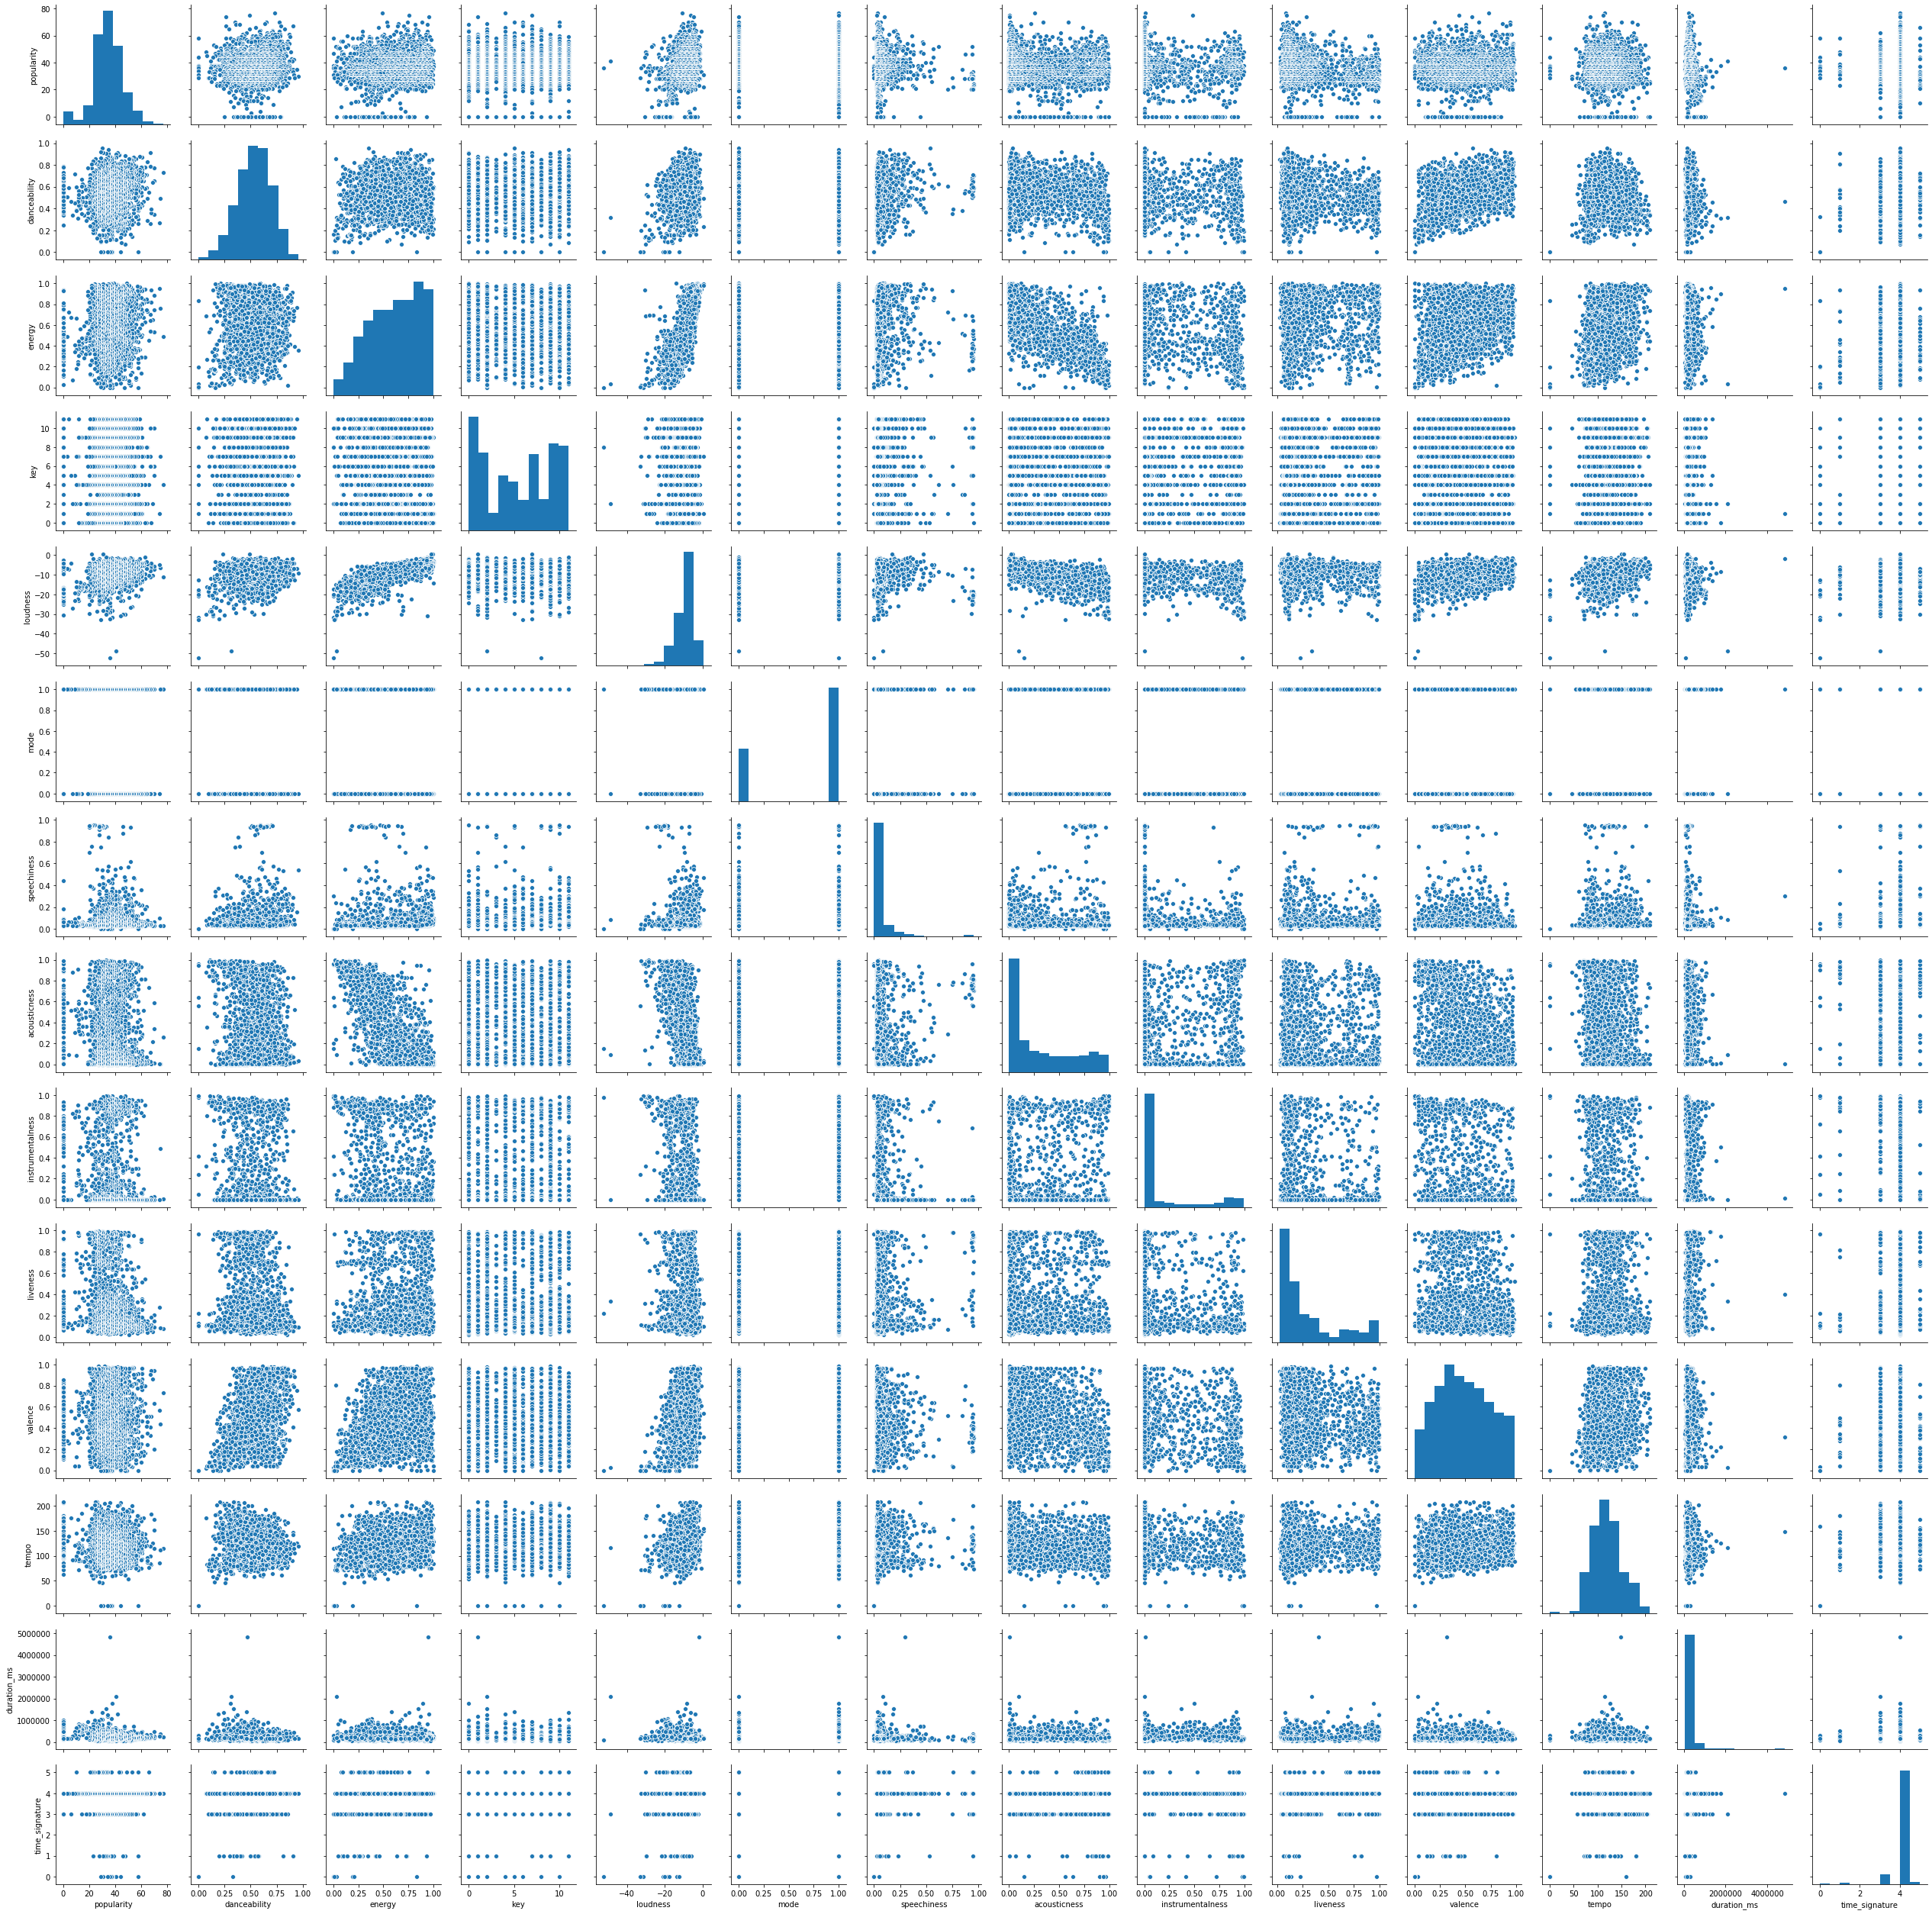

In [61]:
sns.pairplot(df)

In [107]:
len(set(df['key']))

12

In [63]:
lst=set(df.key)
lst=list(lst)

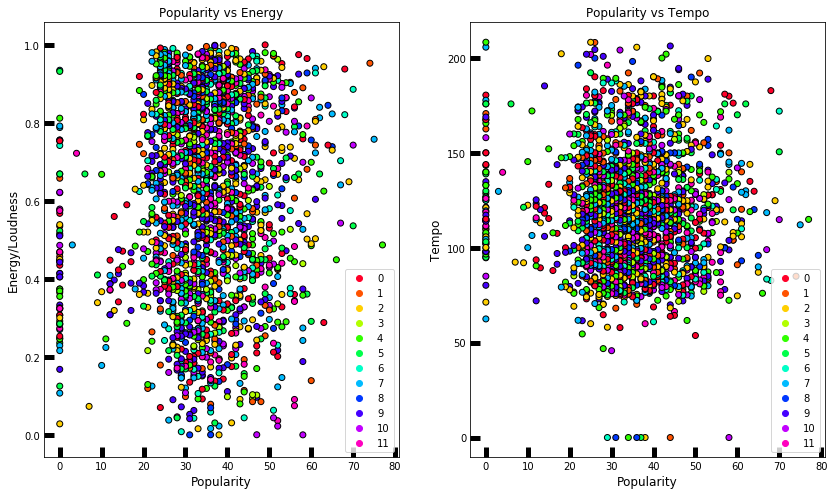

In [64]:
#this will tell us to which cluster does the data observations belong.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,8))
scatter=axes[0].scatter(df.iloc[:, 2], df.iloc[:, 4],c=df.key, cmap='gist_rainbow',edgecolor='k',label=lst)
axes[0].set_xlabel('Popularity', fontsize=12)
axes[0].set_ylabel('Energy/Loudness', fontsize=12)
scatter1=axes[1].scatter(df.iloc[:, 2], df.iloc[:, 13],c=df.key, cmap='gist_rainbow',edgecolor='k',label=lst)
axes[1].set_xlabel('Popularity', fontsize=12)
axes[1].set_ylabel('Tempo', fontsize=12)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Popularity vs Energy', fontsize=12)
axes[1].set_title('Popularity vs Tempo', fontsize=12)
axes[0].legend(handles=scatter.legend_elements()[0], labels=lst)
axes[1].legend(handles=scatter1.legend_elements()[0], labels=lst)

In [65]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [66]:
df.danceability.max()

0.956

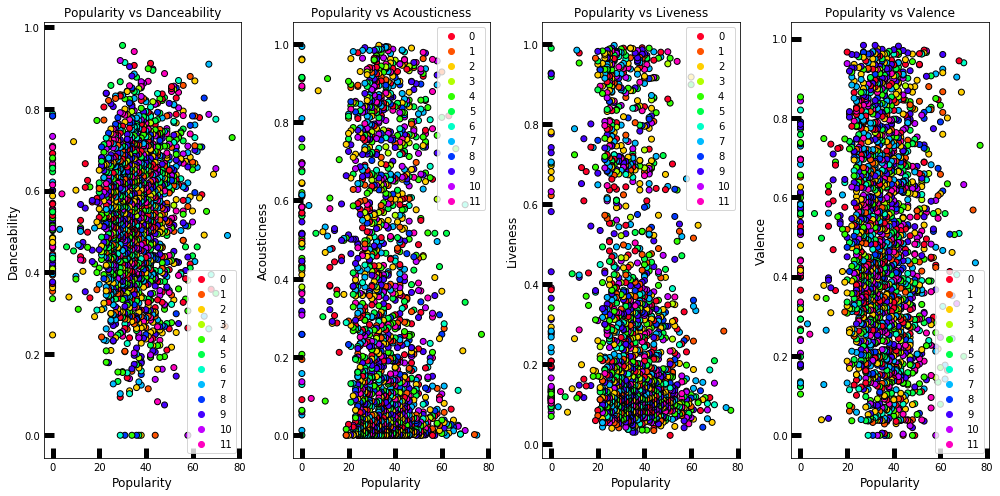

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(14,7))
scatter=axes[0].scatter(df.iloc[:, 2], df.iloc[:, 3],c=df.key, cmap='gist_rainbow',edgecolor='k',label=lst)
axes[0].set_xlabel('Popularity', fontsize=12)
axes[0].set_ylabel('Danceability', fontsize=12)
scatter2=axes[1].scatter(df.iloc[:, 2], df.iloc[:, 9],c=df.key, cmap='gist_rainbow',edgecolor='k',label=lst)
axes[1].set_xlabel('Popularity', fontsize=12)
axes[1].set_ylabel('Acousticness', fontsize=12)
scatter3=axes[2].scatter(df.iloc[:, 2], df.iloc[:, 11],c=df.key, cmap='gist_rainbow',edgecolor='k',label=lst)
axes[2].set_xlabel('Popularity', fontsize=12)
axes[2].set_ylabel('Liveness', fontsize=12)
scatter4=axes[3].scatter(df.iloc[:, 2], df.iloc[:, 12],c=df.key, cmap='gist_rainbow',edgecolor='k',label=lst)
axes[3].set_xlabel('Popularity', fontsize=12)
axes[3].set_ylabel('Valence', fontsize=12)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[2].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[3].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Popularity vs Danceability', fontsize=12)
axes[1].set_title('Popularity vs Acousticness', fontsize=12)
axes[2].set_title('Popularity vs Liveness', fontsize=12)
axes[3].set_title('Popularity vs Valence', fontsize=12)
axes[0].legend(handles=scatter.legend_elements()[0], labels=lst)
axes[1].legend(handles=scatter2.legend_elements()[0], labels=lst)
axes[2].legend(handles=scatter3.legend_elements()[0], labels=lst)
axes[3].legend(handles=scatter4.legend_elements()[0], labels=lst)
plt.tight_layout()

In [108]:
df=df.sort_values('popularity',ascending=False)

In [69]:
df12=df[df['popularity']>60]

In [70]:
lst1=[]
for i in range(len(df12)):
    lst1.append(i)
df12.index=lst1

### Top Songs 

In [71]:
df12

artist_name                                         track_name  \
0            Fleetwood Mac                         Everywhere - 2017 Remaster   
1              David Bowie                             Heroes - 2017 Remaster   
2              Def Leppard            Pour Some Sugar On Me - Remastered 2017   
3   Os Barões Da Pisadinha                                         Tá Rocheda   
4              David Bowie                        Let's Dance - 2018 Remaster   
5            Pablo Alborán                        Y, ¿Si Fuera Ella? - + Es +   
6            Fleetwood Mac                        Little Lies - 2017 Remaster   
7              David Bowie                        Modern Love - 2018 Remaster   
8                     JoJo                         Too Little Too Late - 2018   
9                 The Cars                              Drive - 2017 Remaster   
10                     NCT                                               BOSS   
11                    CHIC                           Le Freak - 2018 Remaster   
12              Ed Sheeran                  Candle In The Wind - 2018 Version   
13                     NCT                                    Baby Don’t Stop   
14                    JoJo                             Leave (Get Out) - 2018   
15              Whitesnake                    Here I Go Again - 2018 Remaster   
16             Def Leppard                       Love Bites - Remastered 2017   
17            Jason Derulo  Colors - Coca-Cola® Anthem, 2018 FIFA World CupTM   
18               Nicky Jam  Live It Up - Official Song 2018 FIFA World Cup...   
19                 A L E X                           I need to paint my walls   
20           Fleetwood Mac                      Seven Wonders - 2017 Remaster   
21             Alan Walker                                                Sky   
22         Bruno & Marrone       Surto De Amor - Ao Vivo Em Uberlândia / 2018   
23               Sean Finn                                      Infinity 2018   
24                     NCT                                              TOUCH   
25               BLACKPINK  SO HOT - THEBLACKLABEL REMIX BLACKPINK ARENA T...   
26     Stone Temple Pilots                              Plush - 2017 Remaster   
27                    CHIC                   I Want Your Love - 2018 Remaster   
28             David Bowie                     Ashes to Ashes - 2017 Remaster   
29             Suzi Quatro                       Stumblin' In - 2017 Remaster   
30                    CHIC                         Good Times - 2018 Remaster   
31                Lost Sky                                    Fearless Pt. II   
32             David Bowie                   Sound and Vision - 2017 Remaster   

    popularity  danceability  energy  key  loudness  mode  speechiness  \
0           77         0.730   0.487    4   -10.991     1       0.0303   
1           75         0.490   0.758    7    -6.491     1       0.0297   
2           74         0.267   0.953    1    -4.899     0       0.0960   
3           70         0.775   0.886    6    -6.680     0       0.0477   
4           70         0.654   0.743   10    -7.440     0       0.0605   
5           70         0.348   0.536    5    -5.760     1       0.0313   
6           69         0.640   0.649    2   -10.345     1       0.0264   
7           68         0.358   0.938    0    -5.577     1       0.0483   
8           68         0.394   0.821    6    -4.304     0       0.0404   
9           67         0.261   0.703    6    -7.871     1       0.0414   
10          67         0.787   0.543   10    -6.700     0       0.0370   
11          67         0.910   0.641    7   -11.316     1       0.0589   
12          66         0.549   0.449    4   -10.479     1       0.0455   
13          65         0.827   0.739    8    -6.391     1       0.0744   
14          65         0.491   0.730    2    -4.399     0       0.0432   
15          65         0.292   0.823    7    -6.763     1       0.0407   
16

In [72]:
df12.head()

artist_name                               track_name  \
0           Fleetwood Mac               Everywhere - 2017 Remaster   
1             David Bowie                   Heroes - 2017 Remaster   
2             Def Leppard  Pour Some Sugar On Me - Remastered 2017   
3  Os Barões Da Pisadinha                               Tá Rocheda   
4             David Bowie              Let's Dance - 2018 Remaster   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.730   0.487    4   -10.991     1       0.0303   
1          75         0.490   0.758    7    -6.491     1       0.0297   
2          74         0.267   0.953    1    -4.899     0       0.0960   
3          70         0.775   0.886    6    -6.680     0       0.0477   
4          70         0.654   0.743   10    -7.440     0       0.0605   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0      0.258000          0.010000    0.0852    0.731  114.965       226653   
1      0.000671          0.484000    0.0920    0.435  112.114       371413   
2      0.002110          0.000000    0.2830    0.568   84.989       267307   
3      0.589000          0.000007    0.0991    0.939  172.017       203076   
4      0.012500          0.027200    0.1530    0.632  114.846       457676   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [73]:
df12.describe()

popularity  danceability     energy        key   loudness       mode  \
count    33.00000     33.000000  33.000000  33.000000  33.000000  33.000000   
mean     65.30303      0.611909   0.728061   4.878788  -7.359758   0.606061   
std       4.43343      0.179753   0.159854   3.038889   3.081077   0.496198   
min      61.00000      0.261000   0.288000   0.000000 -13.404000   0.000000   
25%      61.00000      0.490000   0.641000   2.000000 -10.345000   0.000000   
50%      64.00000      0.657000   0.743000   6.000000  -6.700000   1.000000   
75%      68.00000      0.730000   0.823000   7.000000  -4.899000   1.000000   
max      77.00000      0.910000   0.953000  10.000000  -0.928000   1.000000   

       speechiness  acousticness  instrumentalness   liveness    valence  \
count    33.000000     33.000000         33.000000  33.000000  33.000000   
mean      0.062897      0.145563          0.075364   0.170376   0.577697   
std       0.049943      0.220285          0.218232   0.124832   0.259451   
min       0.026400      0.000202          0.000000   0.043000   0.142000   
25%       0.037000      0.012500          0.000001   0.092000   0.405000   
50%       0.045500      0.032800          0.000078   0.119000   0.559000   
75%       0.058900      0.216000          0.010000   0.187000   0.814000   
max       0.221000      0.816000          0.903000   0.547000   0.960000   

            tempo    duration_ms  time_signature  
count   33.000000      33.000000           33.00  
mean   119.446485  251953.000000            4.00  
std     26.795455   83844.026061            0.25  
min     76.028000  144167.000000            3.00  
25%     99.026000  198777.000000            4.00  
50%    118.533000  223533.000000            4.00  
75%    130.024000  275395.000000            4.00  
max    182.836000  486187.000000            5.00

### This year's data 

In [74]:
df1.head()

Unnamed: 0  Rank                  Track       Artist   Streams  \
0           0     1        Blinding Lights   The Weeknd  46779503   
1           1     2        Don't Start Now     Dua Lipa  37779776   
2           2     3  Roses - Imanbek Remix    SAINt JHN  32190834   
3           3     4                The Box  Roddy Ricch  31653811   
4           4     5           Dance Monkey  Tones And I  29885504   

                                                 URL                track_id  \
0  https://open.spotify.com/track/0VjIjW4GlUZAMYd...  0VjIjW4GlUZAMYd2vXMi3b   
1  https://open.spotify.com/track/3PfIrDoz19wz7qK...  3PfIrDoz19wz7qK7tYeu62   
2  https://open.spotify.com/track/24Yi9hE78yPEbZ4...  24Yi9hE78yPEbZ4kxyoXAI   
3  https://open.spotify.com/track/0nbXyq5TXYPCO7p...  0nbXyq5TXYPCO7pr3N8S4I   
4  https://open.spotify.com/track/1rgnBhdG2JDFTbY...  1rgnBhdG2JDFTbYkYRZAku   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.514   0.730    1    -5.934     1       0.0598       0.00146   
1         0.794   0.793   11    -4.521     0       0.0842       0.01250   
2         0.770   0.724    8    -5.484     1       0.0495       0.01670   
3         0.896   0.586   10    -6.687     0       0.0559       0.10400   
4         0.825   0.593    6    -6.401     0       0.0988       0.68800   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000095    0.0897    0.334  171.005       200040               4  
1          0.000000    0.0952    0.677  123.941       183290               4  
2          0.010500    0.3530    0.898  121.974       176840               4  
3          0.000000    0.7900    0.642  116.971       196653               4  
4          0.000161    0.1700    0.540   98.078       209755               4

In [75]:
df1.drop(['Unnamed: 0','Rank','URL','track_id'],1,inplace=True)

In [76]:
df1.head()

Track       Artist   Streams  danceability  energy  key  \
0        Blinding Lights   The Weeknd  46779503         0.514   0.730    1   
1        Don't Start Now     Dua Lipa  37779776         0.794   0.793   11   
2  Roses - Imanbek Remix    SAINt JHN  32190834         0.770   0.724    8   
3                The Box  Roddy Ricch  31653811         0.896   0.586   10   
4           Dance Monkey  Tones And I  29885504         0.825   0.593    6   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -5.934     1       0.0598       0.00146          0.000095    0.0897   
1    -4.521     0       0.0842       0.01250          0.000000    0.0952   
2    -5.484     1       0.0495       0.01670          0.010500    0.3530   
3    -6.687     0       0.0559       0.10400          0.000000    0.7900   
4    -6.401     0       0.0988       0.68800          0.000161    0.1700   

   valence    tempo  duration_ms  time_signature  
0    0.334  171.005       200040               4  
1    0.677  123.941       183290               4  
2    0.898  121.974       176840               4  
3    0.642  116.971       196653               4  
4    0.540   98.078       209755               4

In [151]:
df1.describe()

Streams  danceability      energy         key    loudness  \
count  2.000000e+02    200.000000  200.000000  200.000000  200.000000   
mean   9.037676e+06      0.696445    0.613995    5.740000   -6.106585   
std    6.405886e+06      0.140880    0.163153    3.676955    2.394263   
min    4.442529e+06      0.218000    0.111000    0.000000  -18.717000   
25%    5.383501e+06      0.606750    0.521500    2.000000   -7.214250   
50%    6.481458e+06      0.714500    0.627000    6.000000   -5.696500   
75%    9.457030e+06      0.806000    0.731000    9.000000   -4.516250   
max    4.677950e+07      0.923000    0.955000   11.000000   -1.865000   

             mode  speechiness  acousticness  instrumentalness    liveness  \
count  200.000000   200.000000    200.000000        200.000000  200.000000   
mean     0.530000     0.112270      0.248999          0.005608    0.165403   
std      0.500352     0.098964      0.259091          0.048142    0.131402   
min      0.000000     0.023200      0.001460          0.000000    0.053200   
25%      0.000000     0.045700      0.047025          0.000000    0.093050   
50%      1.000000     0.068600      0.145000          0.000000    0.116000   
75%      1.000000     0.145750      0.371750          0.000029    0.191000   
max      1.000000     0.481000      0.978000          0.657000    0.962000   

          valence       tempo    duration_ms  time_signature  
count  200.000000  200.000000     200.000000      200.000000  
mean     0.508438  118.670570  200713.375000        4.000000  
std      0.226481   28.083224   40539.009464        0.265239  
min      0.051700   64.934000  106000.000000        1.000000  
25%      0.339250   97.012500  173833.250000        4.000000  
50%      0.508000  116.807000  200113.000000        4.000000  
75%      0.672250  136.520250  219048.750000        4.000000  
max      0.961000  193.896000  361027.000000        5.000000

In [77]:
df1.corr()

Streams  danceability    energy       key  loudness  \
Streams           1.000000      0.112195  0.072843  0.060395  0.050825   
danceability      0.112195      1.000000  0.261741  0.142769  0.345140   
energy            0.072843      0.261741  1.000000  0.047685  0.747144   
key               0.060395      0.142769  0.047685  1.000000  0.037891   
loudness          0.050825      0.345140  0.747144  0.037891  1.000000   
mode             -0.022851     -0.006998 -0.053891 -0.195130  0.060089   
speechiness      -0.006171      0.094066  0.140173 -0.017863 -0.006514   
acousticness     -0.082979     -0.319609 -0.676574 -0.114125 -0.492986   
instrumentalness  0.039963     -0.057952 -0.194803 -0.007726 -0.299367   
liveness          0.126759      0.046764  0.179092  0.035541  0.081528   
valence           0.140782      0.500946  0.526333  0.041918  0.521071   
tempo             0.093573      0.064795  0.116979  0.001770  0.113105   
duration_ms      -0.054391     -0.274667  0.039812 -0.049619  0.050370   
time_signature    0.028711     -0.068451  0.082098 -0.082441  0.049416   

                      mode  speechiness  acousticness  instrumentalness  \
Streams          -0.022851    -0.006171     -0.082979          0.039963   
danceability     -0.006998     0.094066     -0.319609         -0.057952   
energy           -0.053891     0.140173     -0.676574         -0.194803   
key              -0.195130    -0.017863     -0.114125         -0.007726   
loudness          0.060089    -0.006514     -0.492986         -0.299367   
mode              1.000000    -0.080625      0.049840         -0.081942   
speechiness      -0.080625     1.000000     -0.146675          0.010212   
acousticness      0.049840    -0.146675      1.000000          0.192985   
instrumentalness -0.081942     0.010212      0.192985          1.000000   
liveness         -0.094524    -0.024377     -0.078900         -0.043807   
valence           0.067518     0.036274     -0.327587         -0.122742   
tempo            -0.062224     0.298884     -0.113185         -0.000750   
duration_ms      -0.000084    -0.047916      0.012775          0.095051   
time_signature    0.000000     0.063405     -0.000058          0.002101   

                  liveness   valence     tempo  duration_ms  time_signature  
Streams           0.126759  0.140782  0.093573    -0.054391        0.028711  
danceability      0.046764  0.500946  0.064795    -0.274667       -0.068451  
energy            0.179092  0.526333  0.116979     0.039812        0.082098  
key               0.035541  0.041918  0.001770    -0.049619       -0.082441  
loudness          0.081528  0.521071  0.113105     0.050370        0.049416  
mode             -0.094524  0.067518 -0.062224    -0.000084        0.000000  
speechiness      -0.024377  0.036274  0.298884    -0.047916        0.063405  
acousticness     -0.078900 -0.327587 -0.113185     0.012775       -0.000058  
instrumentalness -0.043807 -0.122742 -0.000750     0.095051        0.002101  
liveness          1.000000  0.071835  0.041940     0.041342       -0.078463  
valence           0.071835  1.000000  0.077129    -0.178481        0.011628  
tempo             0.041940  0.077129  1.000000    -0.043924        0.016851  
duration_ms       0.041342 -0.178481 -0.043924     1.000000       -0.025729  
time_signature   -0.078463  0.011628  0.016851    -0.025729        1.000000

Text(0.5, 1, 'Correlation map for different track analysers')

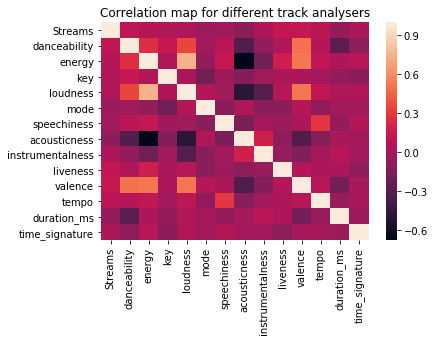

In [78]:
sns.heatmap(df1.corr()).set_title('Correlation map for different track analysers')

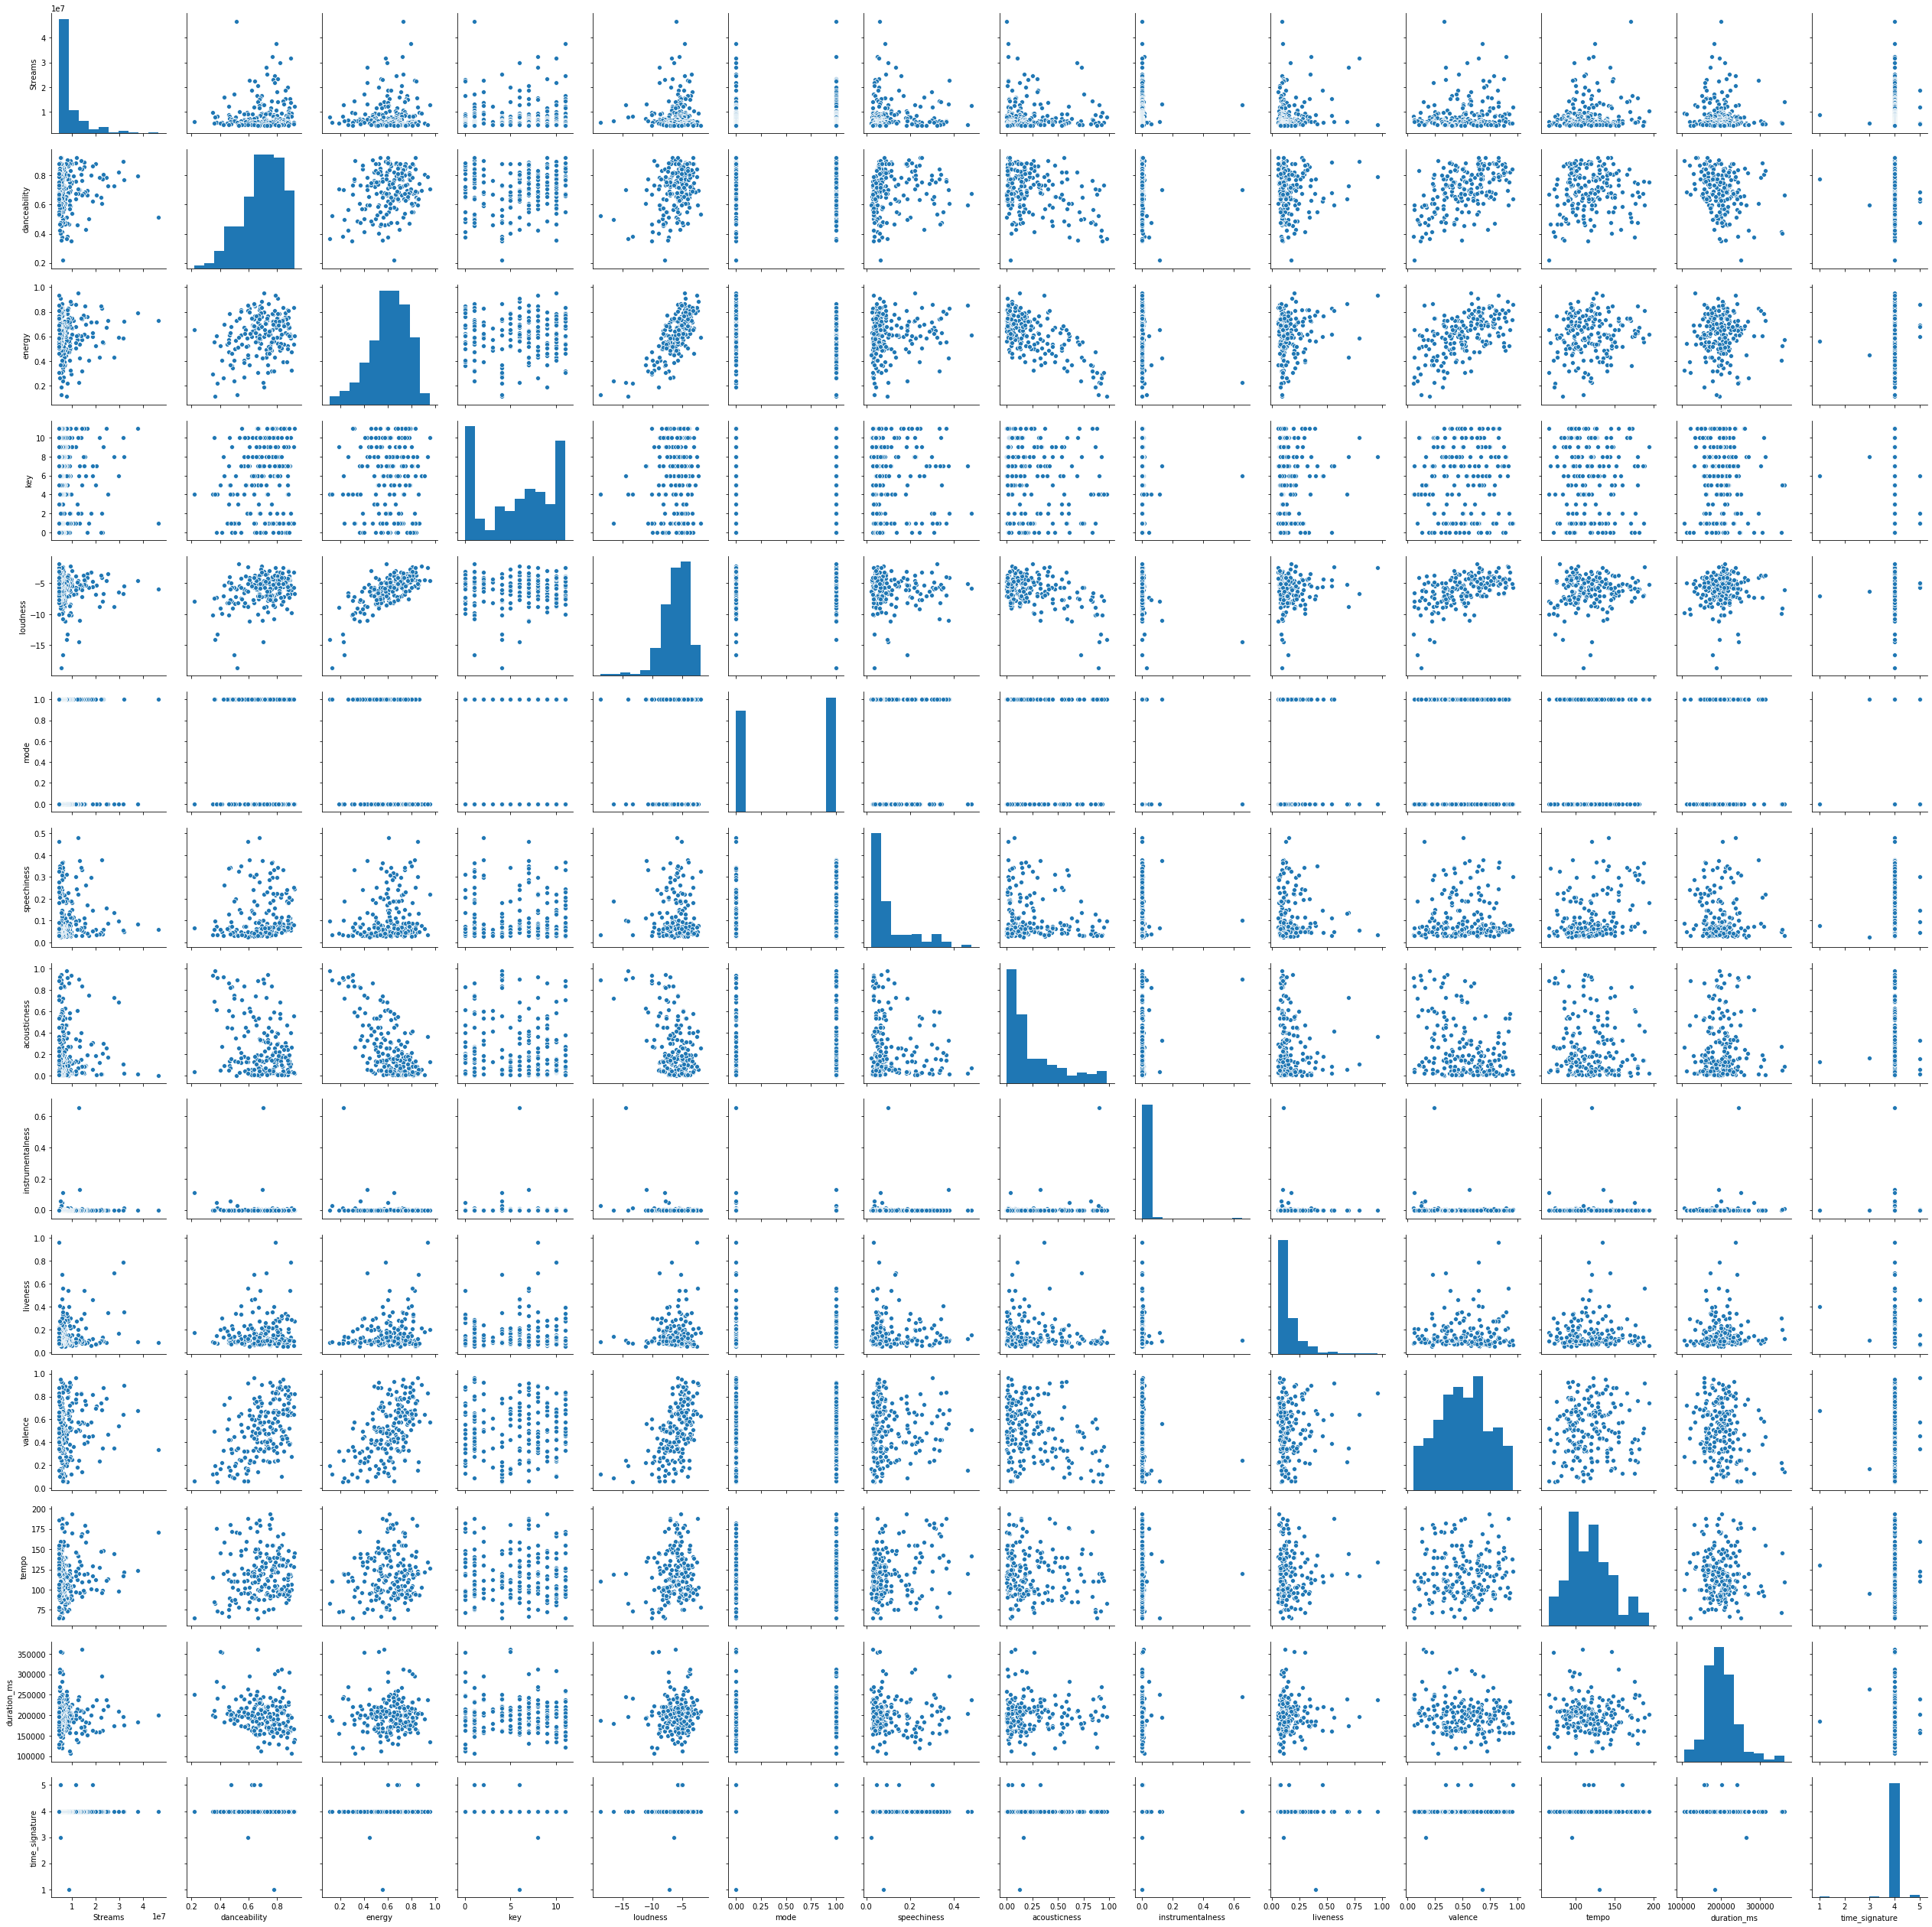

In [79]:
sns.pairplot(df1)

Text(0.5, 1.0, 'Time Duration')

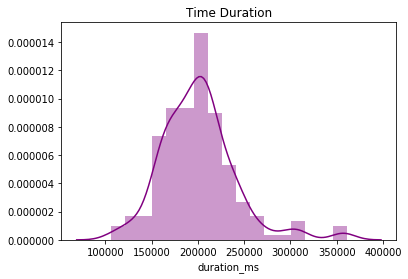

In [80]:
sns.distplot(df1.duration_ms,color='purple').set_title('Time Duration')

Text(0.5, 1.0, 'Major vs Minor')

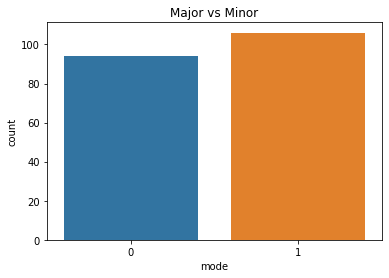

In [81]:
sns.countplot(x='mode',data=df1).set_title('Major vs Minor')

## Results for the tracks from the last decade and this year

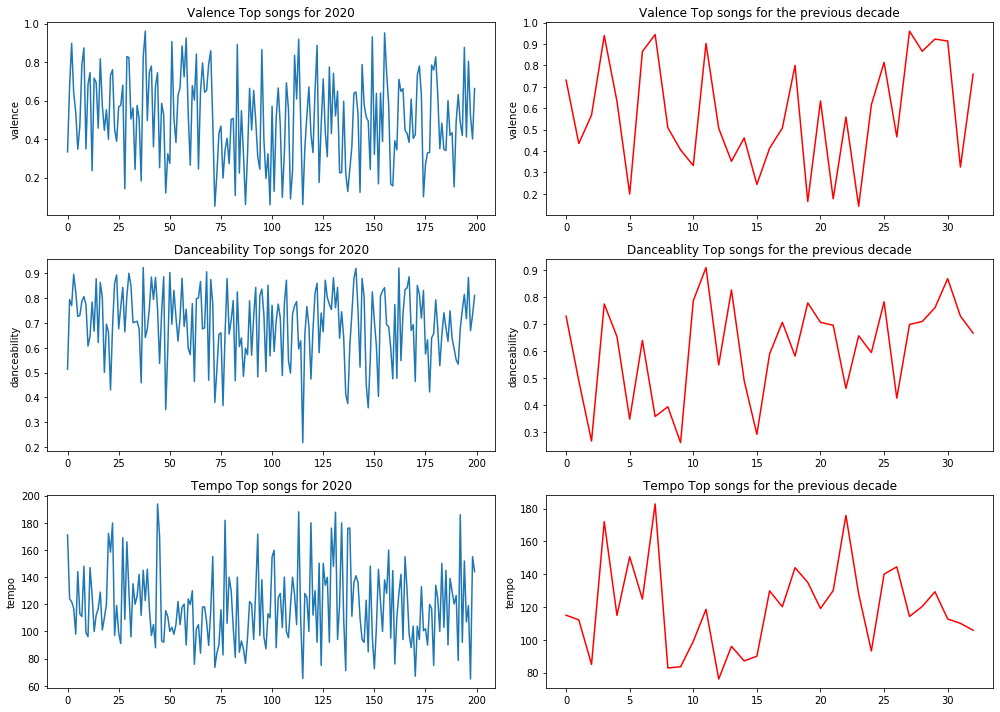

In [82]:
plt.figure(figsize=(14,10))
plt.subplot(3, 2, 1)
sns.lineplot(df1.index,df1.valence).set_title('Valence Top songs for 2020')
plt.subplot(3, 2, 2)
sns.lineplot(df12.index,df12.valence,color='r').set_title('Valence Top songs for the previous decade')
plt.subplot(3, 2, 3)
sns.lineplot(df1.index,df1.danceability).set_title('Danceability Top songs for 2020')
plt.subplot(3, 2, 4)
sns.lineplot(df12.index,df12.danceability,color='r').set_title('Danceablity Top songs for the previous decade')
plt.subplot(3, 2, 5)
sns.lineplot(df1.index,df1.tempo).set_title('Tempo Top songs for 2020')
plt.subplot(3, 2, 6)
sns.lineplot(df12.index,df12.tempo,color='r').set_title('Tempo Top songs for the previous decade')
plt.tight_layout()

### CONCLUSIONS: 
We can clearly see that from the graphs that in the initial stages of the year 2020 people are a bit more inclined towards higher tempo and danceability songs as compared to the previous years , which is quite possible as most of the  people in the world are under lockdown are are continuously looking for some sort of entertainment to break their monotony in these troubled times.

Another important feature is the slight increase in the duration of the length of the song in the alone year, which is also quite visible with each passing year of the previous year.

Rest the common takeaways are that the songs with high energy are more loud, more the acousticness more is the energy of the song,and a strange takeaway is the slight increase in the popularity of song with increase in the duration which also serves as a motivation for the artists to increase the length of their tracks.